

<h1><center>Simple Linear Regression</center></h1>

I downloaded a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h3>Reading the data in</h3>

In [2]:
file_path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df=pd.read_csv(file_path)

<h3> Understanding the Data</h3>


- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

<h3>Data Exploration</h3>

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.corr()['CO2EMISSIONS']

MODELYEAR                        NaN
ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

we found out these features have strong correlated with co2emissions:

ENGINESIZE , CYLINDERS , FUELCONSUMPTION_CITY , FUELCONSUMPTION_HWY , FUELCONSUMPTION_COMB , FUELCONSUMPTION_COMB_MPG 



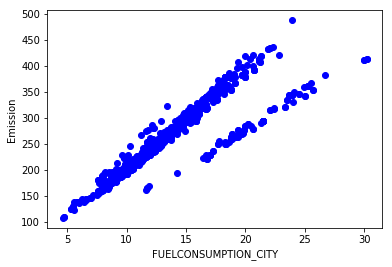

In [7]:
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

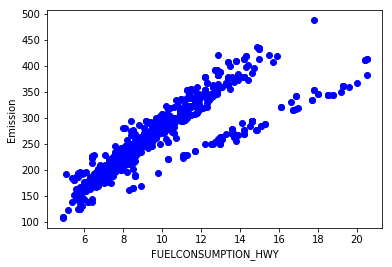

In [8]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")
plt.show()

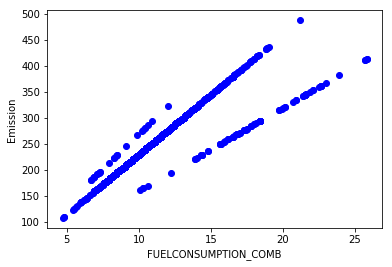

In [9]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

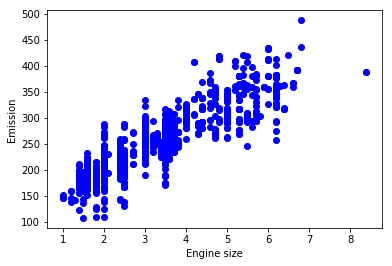

In [10]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

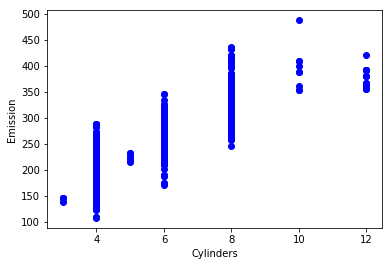

In [11]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

 we Splitted data to trainset and testset,create a model using training set, evaluate your model using test set.
 
 R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse

<h4>R-squared of linear regression between 'ENGINESIZE' and 'CO2EMISSIONS'</h4>

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df[['ENGINESIZE']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(x_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('R-squared:',regr.score(x_test,y_test))

Coefficients:  [39.22117643]
Intercept:  125.68400456178523
R-squared: 0.7672977379444553


<h4>R-squared of linear regression between 'CYLINDERS' and 'CO2EMISSIONS'</h4>

In [29]:
x=df[['CYLINDERS']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(x_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('R-squared:',regr.score(x_test,y_test))

Coefficients:  [30.35104748]
Intercept:  81.30371302713516
R-squared: 0.7261122532861872


<h4>R-squared of linear regression between 'FUELCONSUMPTION_COMB' and 'CO2EMISSIONS'</h4>

In [30]:
x=df[['FUELCONSUMPTION_COMB']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(x_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('R-squared:',regr.score(x_test,y_test))

Coefficients:  [15.9830698]
Intercept:  70.65993920863966
R-squared: 0.7992036144318776


<h4>R-squared of linear regression between 'FUELCONSUMPTION_HWY' and 'CO2EMISSIONS'</h4>

In [31]:
x=df[['FUELCONSUMPTION_HWY']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(x_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('R-squared:',regr.score(x_test,y_test))

Coefficients:  [19.07420984]
Intercept:  74.85784080309477
R-squared: 0.7516910747939269


<h4>R-squared of linear regression between 'FUELCONSUMPTION_CITY' and 'CO2EMISSIONS'</h4>

In [32]:
x=df[['FUELCONSUMPTION_CITY']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

regr = LinearRegression()
regr.fit(x_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('R-squared:',regr.score(x_test,y_test))

Coefficients:  [13.74238972]
Intercept:  73.11648058801268
R-squared: 0.8060169421252512


<h1><center>Multiple Linear Regression</center></h1>
In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression.

In [33]:
x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
regr = LinearRegression()
regr.fit(x_train,y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('R-squared:',regr.score(x_test,y_test))

Coefficients:  [11.68049295  6.64601426 -0.6335661  -2.61778831 12.40921735]
Intercept:  68.40662612098549
R-squared: 0.8672303423683431


As we seen, using multiple features for model has better fit on unseen data

<h1><center>Polynomial Regression</center></h1>
we use polynomial function for fitting better line on data


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y=df['CO2EMISSIONS']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
regr = LinearRegression()
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
test_x_poly = poly.fit_transform(x_test)
train_y_ = regr.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("R2-score:", regr.score(test_x_poly , y_test) )

Coefficients:  [   0.            0.99562337  -11.44267317   -3.75092021   -7.00742604
   43.10482701    4.58476617  -12.88181608  -20.3597995   -14.36493644
   39.49610004    3.3412529    22.58595615   16.75992874  -37.93966127
   52.8552248   107.17136644 -214.9131601    55.16388182 -217.23624842
  215.37254671]
Intercept:  -8.00016344834279
R2-score: 0.8977633418706995


As we seen,  in polynomial function degree 2 the R-squared got better, this means model has better fit on data.But we try for find out what order for polynomial is the best.

In [41]:
list_order=[]
for i in range(0,11):
    poly = PolynomialFeatures(degree=i)
    train_x_poly = poly.fit_transform(x_train)
    test_x_poly = poly.fit_transform(x_test)
    train_y_ = regr.fit(train_x_poly, y_train)
    list_order.append(regr.score(test_x_poly , y_test))
print('R-squared:',list_order)

R-squared: [-0.0021763998234047843, 0.8672303423683433, 0.8977633418706995, 0.9131528995464736, 0.8972651342249541, -13.029199000047628, -2412.182895282702, -38720563.80407136, -50541259.709169164, -80401824.03678522, -1406371813.6822588]


As we seen, best R-squared for model is for order 3 equal to 0.91
now we try to show it with plot

Text(0, 0.5, 'R^2')

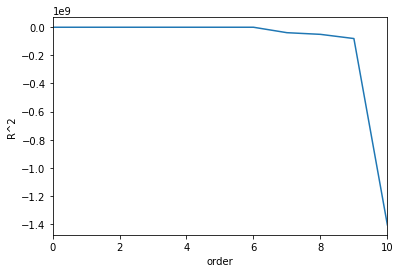

In [40]:
import matplotlib.pyplot as plt
x=range(0,11)
y=list_order
df=pd.DataFrame(y)
df.loc[:,0].plot(kind='line')
plt.xlabel('order')
plt.ylabel('R^2')

we see around order 5 the model start to overfitting

<h2>Conclusion</h2>

After exploratory on data we found out which features have most strenght correlation on CO2EMISSIONS.Then we plotted each of them to see weather  which model is better,linear model or non-linear ,it seemed a linear model can be good,so, I divided data to train and test,made a model with  <b>simple linear regression</b> , I trained model with train data and tested model with test set(unseen data).It was resulted best <b>R-squared equal to 0.80</b>.
Then I used <b>multiple linear regression</b> and obtained best <b> R-squared equal to 0.86</b>.
Then I used a polynomial order 2  function in multiple regression and I trained model and tested on test data,<b>R-squared becomes better equal to 0.89</b>.then I tryied to find best order for this polynomial function and I founded order 3 with best R-squared equal to <b> 0.91</b>.so I can say <b>best model for predict co2emissions is a polynomial order 3 multiple regression</b>.